In [2]:
# liabraires
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))


Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Pandas: 0.22.0
NumPy: 1.14.2
Scikit-learn: 0.19.1
Matplotlib: 2.2.2


In [3]:
from sklearn import datasets

iris = datasets.load_iris()

features = iris.data
target = iris.target

df = pd.DataFrame(features)
df.columns = iris.feature_names
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df)
plt.show()

<Figure size 640x480 with 16 Axes>

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
from sklearn.cluster import KMeans

X = []
Y = []

for i in range(1,31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    
    X.append(i)
    Y.append(kmeans.inertia_ / df.shape[0])



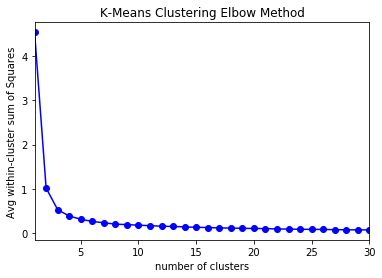

In [9]:
plt.plot(X, Y, 'bo-')
plt.xlim(1,30)
plt.xlabel('number of clusters')
plt.ylabel('Avg within-cluster sum of Squares')
plt.title('K-Means Clustering Elbow Method')

plt.show()

# Principle Component Analysis

In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components = 2)
pc = pca.fit_transform(df)

print(type(pc))
print(pc.shape)
pc[0:10]

<class 'numpy.ndarray'>
(150, 2)


array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

In [13]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Visualization of PCA-reduced Data

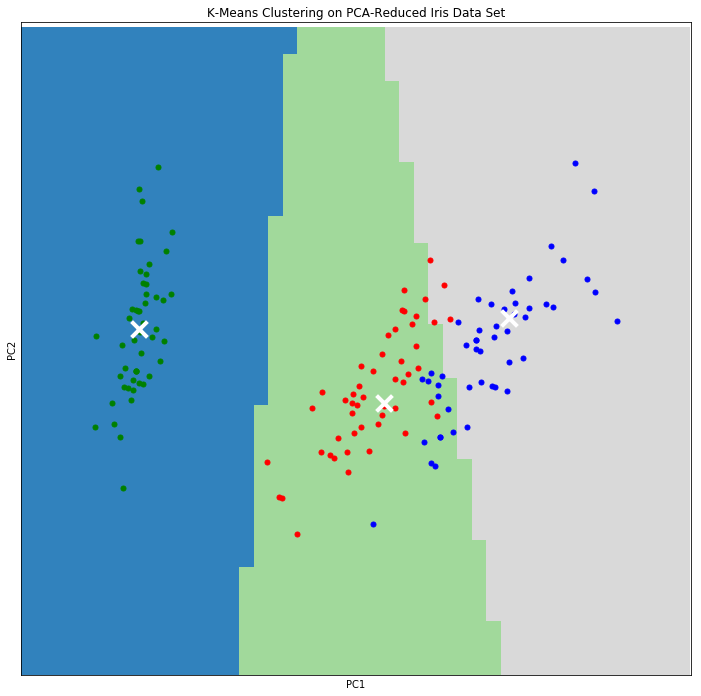

In [42]:
h = 0.2

x_min, x_max = pc[: ,0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[: ,1].min() - 1, pc[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(12,12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', 
          origin = 'lower'
          )

#plt.show()
        
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10 )
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10 )
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10 )

#plt.show()
        
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4, color = 'w', zorder = 10)


plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()
        

In [39]:
from sklearn import metrics

kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(df)

kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)

print("Non-reduced data")
print("Homogenity score {}".format(metrics.homogeneity_score(target, kmeans1.labels_)))
print("Completeness score {}".format(metrics.completeness_score(target, kmeans1.labels_)))
print("V measure score {}".format(metrics.v_measure_score(target, kmeans1.labels_)))

print("Reduced data")
print("Homogenity score {}".format(metrics.homogeneity_score(target, kmeans2.labels_)))
print("Completeness score {}".format(metrics.completeness_score(target, kmeans2.labels_)))
print("V measure score {}".format(metrics.v_measure_score(target, kmeans2.labels_)))


Non-reduced data
Homogenity score 0.7514854021988338
Completeness score 0.7649861514489815
V measure score 0.7581756800057784
Reduced data
Homogenity score 0.736419288125285
Completeness score 0.7474865805095325
V measure score 0.7419116631817838


# !-------------------------------------------- Thank You -------------------------------------------------!